# Basic sampling tutorial

In this tutorial you will learn the basics of the sampling workflow. This tutorial builds off of the external model tutorial

In [24]:
#First, let's import the relavant modules:
import romtools
import os
import numpy as np
from matplotlib import pyplot as plt
from romtools.workflows import sampling
from romtools.workflows import ParameterSpace

In [27]:
#Now, we can run a sampling algorithm (https://pressio.github.io/rom-tools-and-workflows/romtools/workflows/sampling/sampling.html)
if __name__ == "__main__":
    # As a starting point, we will use the model for the advection diffusion equation created in the external_model tutorial
    from ipynb.fs.full.external_model import adrExternalRomToolsModel
    myModel = adrExternalRomToolsModel()

    # We will use the parameter space created in the parameter space tutorial
    from ipynb.fs.full.parameter_space import BasicParameterSpace
    myParameterSpace = BasicParameterSpace()

    #The sampling algorithm requires a directory argument of where to put all the generated samples, files, etc.
    work_directory = os.getcwd() + '/sampling_tutorial/'
    
    #Now we can run the sampling algorithm.
    
    sample_directories = sampling.run_sampling(
    	model = myModel,
    	parameter_space = myParameterSpace,
    	absolute_sampling_directory=work_directory,
        number_of_samples = 5)
#The sample_directories returned by the algorithm contains all the directories that samples were run in:
# work_directory/run_0
# work_directory/run_1
# ...
# work_directory/run_4

=======  Sample 0 ============
Running
Sample complete, run time = 0.12265396118164062
 
=======  Sample 1 ============
Running
Sample complete, run time = 0.08628201484680176
 
=======  Sample 2 ============
Running
Sample complete, run time = 0.12367725372314453
 
=======  Sample 3 ============
Running
Sample complete, run time = 0.07750988006591797
 
=======  Sample 4 ============
Running
Sample complete, run time = 0.11723208427429199
 


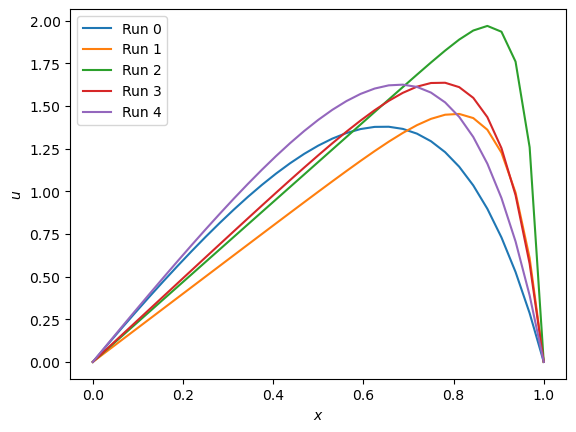

In [20]:
#Now we can look at the solutions
for (i,sample_dir) in enumerate(sample_directories):
    data = np.load(sample_dir + '/solution.npz')
    plt.plot(data['x'],data['u'],label='Run ' + str(i))

plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.show()

#That's it!